## **Camera Calibration.**

It is essential to remove the distortion in the Jetbot cameras before using its images as input to the DL model. Usually, pre-trained deep Learning models are trained on the ImageNet dataset. Using uncalibrated images to train a Deep Learning model could potentially reduce the model performance.

First you will need to buy or print the checkerboard shown below

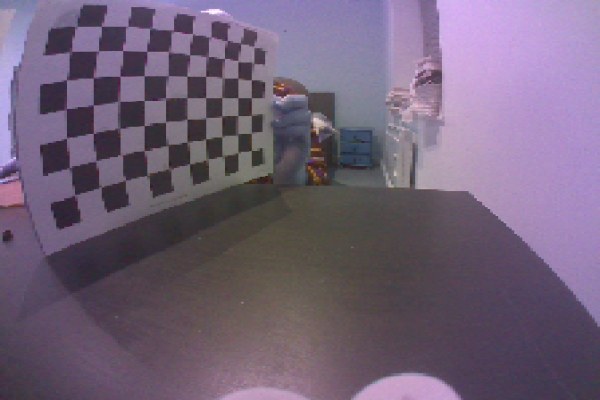

---



The link to the checkerborad can be found [here](https://markhedleyjones.com/projects/calibration-checkerboard-collection)

Below is the code that can be used to undistored the camera's images. You will need to provide several images with checkerboard with different poses. **Ten images** with different checkerboard poses should be enough but more will be better.

In [2]:
import cv2
import glob
import numpy as np
from PIL import Image 

In [ ]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((10*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:10].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

# Path to your checkerboard images
images = glob.glob('/Path/to/Checkerboard/images/*.png')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,10),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,10), corners2,ret)
        img = Image.fromarray(np.uint8(img))
        display(img)
        #cv2.imshow('img',img)
        cv2.waitKey(500)

cv2.destroyAllWindows()

You should receive images like this one below

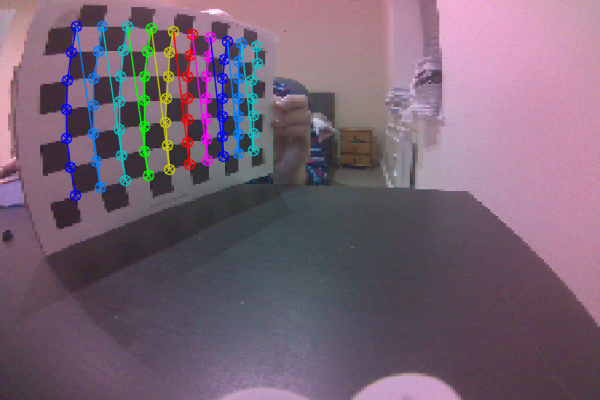

Obtain the necessary undestortion matrices.

In [ ]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

In [ ]:
# undistort
img = cv2.imread('img100.png')
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

In [ ]:
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

In [ ]:
img = Image.fromarray(np.uint8(dst))
display(img)

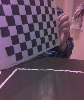

The obtained image is basically obtained by transforming some pixels within a linear area and it is the center of the original image.

We will use the Undistort command to before feeding the image to the DL model. 